# Explore Shelter Waitlist Data

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata

In [10]:
df = pd.read_csv("waitlist.csv")

In [11]:
df

,Position,Seniority Number,DOB,CHANGES ID,SR #,Instructions
0,1220,19055008,12-18-1940,316167,10523796,NaN
1,1219,19055007,06-11-1972,315488,10524948,NaN
2,1218,19055006,10-13-1992,409830,10525209,NaN
3,1217,19055005,09-10-1990,408137,10525845,NaN
4,1216,19055004,04-23-1970,367464,10525860,NaN
5,1215,19055003,09-28-1960,416346,10526188,NaN
6,1214,19055002,01-04-1970,406733,10523792,NaN
7,1213,19055001,05-01-1992,357010,10526919,NaN
8,1212,19054024,01-09-1964,415989,10522454,NaN
9,1211,19054023,06-28-1975,396729,10521409,NaN


In [17]:
avg_age = 2019 - df['DOB'].apply(lambda x: int(x[-4:])).mean()

avg_age

48.913934426229616

In [26]:
num_people_over_60 = len(df[df['DOB'].apply(lambda x: int(x[-4:]) < 1959)].index)

num_people_over_60

255

In [27]:
num_people_under_25 = len(df[df['DOB'].apply(lambda x: int(x[-4:]) >= 1993)].index)

num_people_under_25

48

In [29]:
client = Socrata("data.sfgov.org", None)

# This string is the weird endpoint for this dataset?
results = client.get("w4sk-nq57", limit=2000)
results_df = pd.DataFrame.from_records(results)

In [7]:
results_df

,caseid,dob,message,position_number,reservation_seniority,txtchangesid
0,9978068,07-30-1970,NaN,1,18361027,40086
1,9982247,01-01-1960,NaN,2,18362007,51512
2,9981556,11-17-1966,NaN,3,18362024,290663
3,9984945,04-23-1981,NaN,4,18363021,359348
4,9990788,04-23-1974,NaN,5,18364009,295301
5,10301275,04-19-1986,"Please call 311 between 8:30AM and 4:30PM, Mon...",6,19002005,11332
6,10306757,12-20-1995,"Please call 311 between 8:30AM and 4:30PM, Mon...",7,19003030,415105
7,10309740,03-08-1976,"Please call 311 between 8:30AM and 4:30PM, Mon...",8,19004001,389411
8,10308649,11-29-1977,"Please call 311 between 8:30AM and 4:30PM, Mon...",9,19004003,372737
9,10309043,09-25-1961,"Please call 311 between 8:30AM and 4:30PM, Mon...",10,19004006,376126


In [35]:
# Filter out the range values
df = results_df[~results_df['dob'].apply(lambda x: int(x[-4:])).isin([1895, 2019])]

def group_ages(x):
    year = int(x[-4:])
    #print(year)
    if year <= 1954:
        return '65+'
    if year <= 1964 and year >= 1955:
        return '55-64'
    if year <= 1974 and year >= 1965:
        return '45-54'
    if year <= 1984 and year >= 1975:
        return '35-44'
    if year >= 1985:
        return '18-35'
#     if year <= 1969 and year >= 1955:
#         return '50-64'
#     if year <= 1989 and year >= 1970:
#         return '30-49'
#     if year >= 1990:
#         return '18-29'

year_counts = df['dob'].apply(lambda x: group_ages(x)).value_counts().sort_index()
year_counts

18-35    213
35-44    257
45-54    279
55-64    326
65+      140
Name: dob, dtype: int64

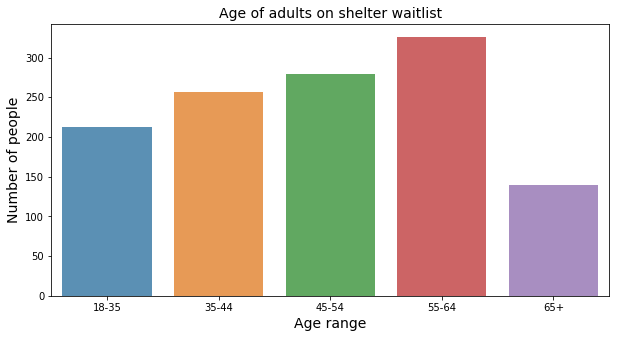

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(year_counts.index, year_counts.values, alpha=0.8)
plt.title('Age of adults on shelter waitlist', fontsize=14)
plt.ylabel('Number of people', fontsize=14)
plt.xlabel('Age range', fontsize=14)
plt.show()